<a href="https://colab.research.google.com/github/WittmannF/covid-projects/blob/master/confirmed-cases-compare-country-dates/compare_countries_playground.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exploring Historical Data of Confirmed Cases per Country
This is a notebook for playing and exploring a dataset of confirmed cases over the last 3 months. In the end I brainstorm a way to compare the dates of two countries and put them side by side. 

The dataset comes from [COVID-19 Data Repository by Johns Hopkins CSSE](https://github.com/CSSEGISandData/COVID-19) which is scrapped from [WHO's Situation Reports PDFs]() although there are [some divergences](https://github.com/CSSEGISandData/COVID-19/issues/985). 

In [0]:
# Imports
import pandas as pd
import numpy as np

In [0]:
# Parameters
URL = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv"

In [0]:
# Read historical dataset with confirmed cases
df = pd.read_csv(URL)

In [70]:
df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,14,14,14,19,19,19,19,25,25,25,25,32,32,32,33,33,33,33,33,34,35,35,35,35,35,35,35,35,37,40,40,41,42,42,43,43,43,47,48,50,50,50,53,59,70,75,82,114,147,177
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,7,7,11,15,20,20,20,22,22,45,25,25,26,26,26,28,28,29,43,59,66,74,84,94,105,122,147,159,170,189,214,228,241,256,274,293,331,360,420,461,502,511,581,639,639,701,773,839,825,878
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,7,7,10,13,16,18,18,24,28,28,30,33,40,45,47,50,58,67,72,75,77,81,84,84,85,85,89,89,91,93,93,93,102,106,108,110,110,117,130,138,150,150,160,178,178,200,212,226,243,266
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,4,7,8,8,8,8,8,10,12,12,12,16,16,18,18,18,19,19,22,22,22,22,22,22,22,22,22,22,22,22,23,23,25,29,29,36,50,50,83,93,99,117,129,149,149,197,238,428,566,673


Let's select some countries for further investigation

In [0]:
japan = df[df['Country/Region']=='Japan']

In [72]:
japan

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20
1,NaN,Japan,36.0,138.0,2,1,2,2,4,4,7,7,11,15,20,20,20,22,22,45,25,25,26,26,26,28,28,29,43,59,66,74,84,94,105,122,147,159,170,189,214,228,241,256,274,293,331,360,420,461,502,511,581,639,639,701,773,839,825,878


In [0]:
brazil = df[df['Country/Region']=='Brazil']

In [74]:
brazil

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20
35,NaN,Brazil,-14.235,-51.9253,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,2,2,2,2,4,4,13,13,20,25,31,38,52,151,151,162,200,321


In [0]:
china = df[df['Country/Region']=='China']

In [0]:
china = china.groupby('Country/Region').sum()

In [77]:
china

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
China,1083.3367,3684.4197,548,643,920,1406,2075,2877,5509,6087,8141,9802,11891,16630,19716,23707,27440,30587,34110,36814,39829,42354,44386,44759,59895,66358,68413,70513,72434,74211,74619,75077,75550,77001,77022,77241,77754,78166,78600,78928,79356,79932,80136,80261,80386,80537,80690,80770,80823,80860,80887,80921,80932,80945,80977,81003,81033,81058


In [0]:
italy = df[df['Country/Region']=='Italy']

In [79]:
italy

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20
16,NaN,Italy,43.0,12.0,0,0,0,0,0,0,0,0,0,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,20,62,155,229,322,453,655,888,1128,1694,2036,2502,3089,3858,4636,5883,7375,9172,10149,12462,12462,17660,21157,24747,27980,31506


Let's compare all of those countries using the same dates

In [0]:
countries = {'brazil': brazil,
             'japan': japan,
             'china': china,
             'italy': italy}

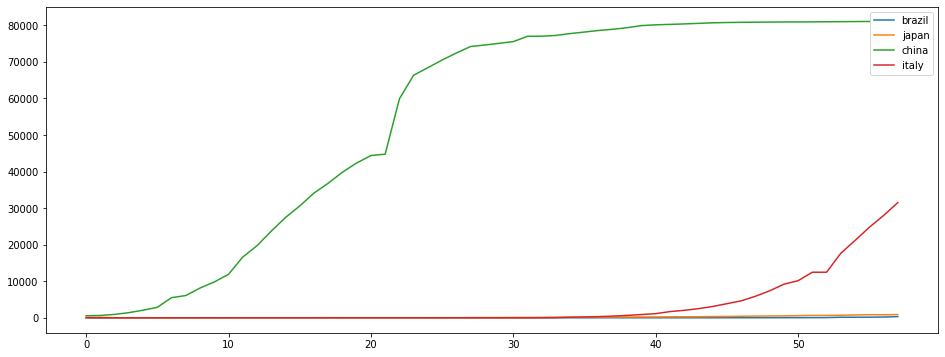

In [81]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 6))
for country, data in countries.items():
    plt.plot(data.values[0][2:], label=country)
plt.legend()

### Which date of Italy is Japan right now?
Before generalizing for any country, I am going to select two countries and compare both by hand. The way that I am going to re-scale the dates when comparing two countries is the following:
1. Select the max number of cases for the country that is behind. 
2. Use that value for filtering the cases for the countrie with the most cases.
3. Align their date axes

In [91]:
# Select only columns with dates
date_cols = df.columns[4:]; date_cols

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20', '2/1/20', '2/2/20',
       '2/3/20', '2/4/20', '2/5/20', '2/6/20', '2/7/20', '2/8/20', '2/9/20',
       '2/10/20', '2/11/20', '2/12/20', '2/13/20', '2/14/20', '2/15/20',
       '2/16/20', '2/17/20', '2/18/20', '2/19/20', '2/20/20', '2/21/20',
       '2/22/20', '2/23/20', '2/24/20', '2/25/20', '2/26/20', '2/27/20',
       '2/28/20', '2/29/20', '3/1/20', '3/2/20', '3/3/20', '3/4/20', '3/5/20',
       '3/6/20', '3/7/20', '3/8/20', '3/9/20', '3/10/20', '3/11/20', '3/12/20',
       '3/13/20', '3/14/20', '3/15/20', '3/16/20', '3/17/20'],
      dtype='object')

In [0]:
japan = japan[date_cols].T

In [99]:
japan.columns=['Japan']; japan.head()

,Japan
1/22/20,2
1/23/20,1
1/24/20,2
1/25/20,2
1/26/20,4


In [0]:
italy = italy[date_cols].T

In [103]:
italy.columns=['Italy']; italy.head()

,Italy
1/22/20,0
1/23/20,0
1/24/20,0
1/25/20,0
1/26/20,0


Let's first try to compare both by hand

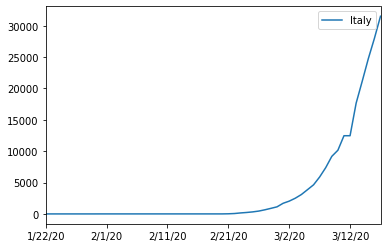

In [104]:
italy.plot()

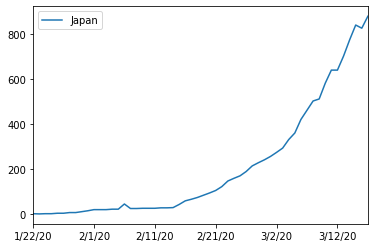

In [105]:
japan.plot()

In [117]:
coutry_names = ['Japan', 'Italy']
idx_top = np.argmin([max(japan['Japan'].values), max(italy['Italy'].values)])

# Max number of cases to be filtered out from each
top_cases = min([max(japan['Japan'].values), max(italy['Italy'].values)])
print(f'{coutry_names[1-idx_top]} will be limited by the number of cases in {coutry_names[idx_top]} which is {top_cases}')

Italy will be limited by the number of cases in Japan which is 878


In [0]:
top_cases = int(top_cases*1.1) # Let's extrapolate a little 

In [121]:
italy = italy[italy.values<=top_cases]
italy.head()

,Italy
1/22/20,0
1/23/20,0
1/24/20,0
1/25/20,0
1/26/20,0


In [123]:
japan = japan[japan.values<=top_cases]
japan.head()

,Japan
1/22/20,2
1/23/20,1
1/24/20,2
1/25/20,2
1/26/20,4


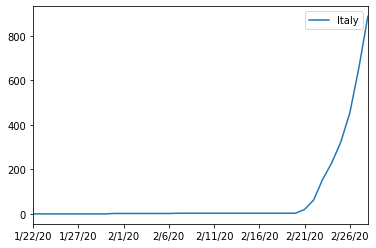

In [125]:
italy.plot()

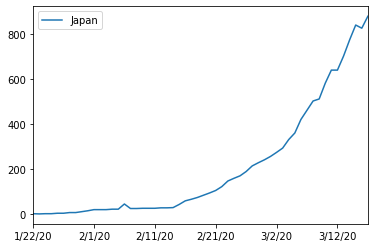

In [124]:
japan.plot()

Next, let's get the last N indexes from the country that has the most indexes

In [0]:
n_indexes = min(len(japan), len(italy))

In [0]:
japan_filt = japan.iloc[-n_indexes:]
italy_filt = italy.iloc[-n_indexes:]

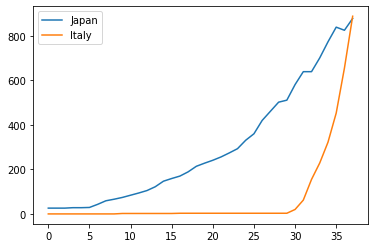

In [142]:
plt.plot(japan_filt.values.T[0], label=coutry_names[0])
plt.plot(italy_filt.values.T[0], label=coutry_names[1])
plt.legend()

In [165]:
japan_filt=japan_filt.reset_index()
japan_filt.columns=['date_japan', 'Japan']
japan_filt.head()

,date_japan,Japan
0,2/9/20,26
1,2/10/20,26
2,2/11/20,26
3,2/12/20,28
4,2/13/20,28


In [166]:
italy_filt=italy_filt.reset_index()
italy_filt.columns=['date_italy', 'Italy']
italy_filt.head()

,date_italy,Italy
0,1/22/20,0
1,1/23/20,0
2,1/24/20,0
3,1/25/20,0
4,1/26/20,0


In [168]:
# Side by side
pd.concat([italy_filt[::-1], japan_filt[::-1]], axis=1)

,date_italy,Italy,date_japan,Japan
37,2/28/20,888,3/17/20,878
36,2/27/20,655,3/16/20,825
35,2/26/20,453,3/15/20,839
34,2/25/20,322,3/14/20,773
33,2/24/20,229,3/13/20,701
32,2/23/20,155,3/12/20,639
31,2/22/20,62,3/11/20,639
30,2/21/20,20,3/10/20,581
29,2/20/20,3,3/9/20,511
28,2/19/20,3,3/8/20,502


In [162]:
len(japan_filt)

38

Some conclusions:

*   We can only compare countries if they have approximately the same slope, which is not the case here (i.e. japan's increase per day is way smaller than Italy)

For the future
*   Use rolling mean
*   Find countries with similar derivatives in order to be compared

